In [1]:
import pandas as pd
df= pd.read_csv("heart.csv")               

<ipython-input-1-f5f805fbd330>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
from sklearn.model_selection import train_test_split 
X, y= df.drop("target", axis=1), df["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.4, random_state=9)


In [4]:
###Scale-Insensitive 

In [5]:
from sklearn.ensemble import RandomForestClassifier 

forest= RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [7]:
from sklearn.ensemble import GradientBoostingClassifier 

gb_clf= GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [8]:
###Scale-Sensitive

In [9]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [11]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_scaled, y_train)


LogisticRegression()

In [12]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled,y_train)

SVC()

In [13]:
forest.score(X_test,y_test)

0.9853658536585366

In [14]:
nb_clf.score(X_test,y_test)

0.8463414634146341

In [15]:
gb_clf.score(X_test,y_test)

0.9707317073170731

In [16]:
knn.score(X_test_scaled,y_test)

0.8536585365853658

In [17]:
log.score(X_test_scaled,y_test)

0.8731707317073171

In [18]:
svc.score(X_test_scaled,y_test)

0.9341463414634147

In [19]:
from sklearn.metrics import recall_score

y_preds = forest.predict(X_test)
print("Forest:",recall_score(y_test,y_preds))

y_preds = nb_clf.predict(X_test)
print("NB:",recall_score(y_test,y_preds))

y_preds = gb_clf.predict(X_test)
print("GB:",recall_score(y_test,y_preds))

y_preds = knn.predict(X_test_scaled)
print("KNN:",recall_score(y_test,y_preds))

y_preds = log.predict(X_test_scaled)
print("Log:",recall_score(y_test,y_preds))

y_preds = svc.predict(X_test_scaled)
print("SVC:",recall_score(y_test,y_preds))

Forest: 0.9859154929577465
NB: 0.9014084507042254
GB: 0.9859154929577465
KNN: 0.8732394366197183
Log: 0.92018779342723
SVC: 0.9530516431924883


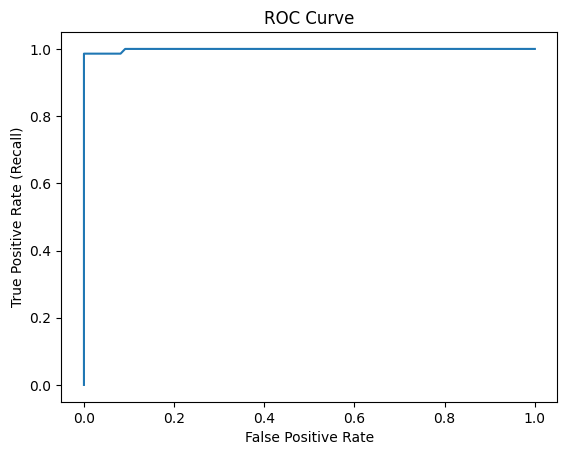

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = forest.predict_proba(X_test)[:, 1]

fpr,tpr, thresholds = roc_curve(y_test,y_probs)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.show()



In [21]:
roc_auc_score(y_test,y_probs)

0.998784585686709

In [22]:
### Hyperparameter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100,200,500],
    "max_depth" : [None, 10,20,30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4],
    "max_features" : ["sqrt","log2", None]}

forest = RandomForestClassifier(n_jobs= -1, random_state= 9)

grid_search = GridSearchCV(forest, param_grid, cv=3, n_jobs =-1, verbose=2)

In [24]:

# Ensure the grid search is properly fitted before accessing best_estimator_
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are defined elsewhere in the notebook
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid)

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

# Access the best estimator after fitting
best_forest = grid_search.best_estimator_
print("Best estimator:", best_forest)


Best estimator: RandomForestClassifier(max_depth=20, n_estimators=50)


In [25]:
##Feature Importances

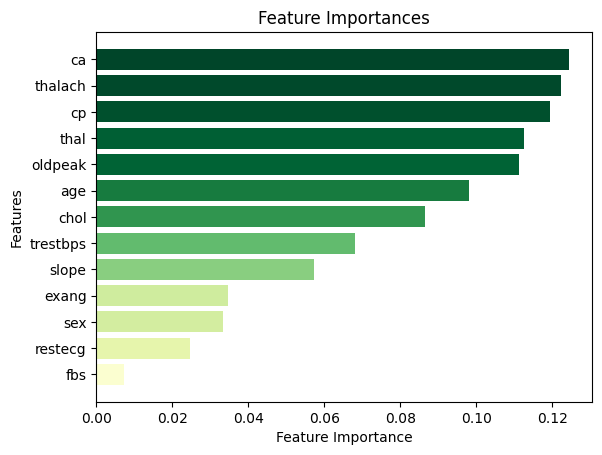

In [29]:
import numpy as np

feature_importances = best_forest.feature_importances_
features = best_forest.feature_names_in_

sorted_idx = np.argsort(feature_importances)
sorted_features= features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

colors = plt.cm.YlGn(sorted_importances / max(sorted_importances))

plt.barh(sorted_features,sorted_importances, color =colors)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

In [30]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGn")

<class 'ModuleNotFoundError'>: No module named 'seaborn'